In [70]:
asset <- read.csv("Asset.csv")
asset[,1] <- as.Date(asset[,1],"%d.%m.%y")
len <-  dim(asset)[1]
b <- 20
head(asset) 

,X.DATE.,X.CLOSE.
,<date>,<dbl>
1,2020-02-05,255.20
2,2020-02-06,252.11
3,2020-02-07,254.30
4,2020-02-10,252.26
5,2020-02-11,254.50
6,2020-02-12,254.50


In [71]:
tail(asset)

,X.DATE.,X.CLOSE.
,<date>,<dbl>
247,2020-01-29,258.11
248,2020-02-01,263.80
249,2020-02-02,263.15
250,2020-02-03,263.53
251,2020-02-04,270.11
252,2020-02-05,271.70


In [72]:
imoex <- read.csv("IMOEX.csv")
imoex[,1] <- as.Date(imoex[,1],"%d.%m.%y")
len <-  dim(imoex)[1]
b <- 20
head(imoex) 

,X.DATE.,X.CLOSE.
,<date>,<dbl>
1,2020-02-05,3114.25
2,2020-02-06,3096.68
3,2020-02-07,3087.63
4,2020-02-10,3062.41
5,2020-02-11,3097.58
6,2020-02-12,3122.27


In [73]:
tail(imoex)

,X.DATE.,X.CLOSE.
,<date>,<dbl>
247,2020-01-29,3277.08
248,2020-02-01,3291.14
249,2020-02-02,3360.25
250,2020-02-03,3343.46
251,2020-02-04,3372.00
252,2020-02-05,3392.73


In [74]:
# Выключаю вывод предупреждающих сообщений warning
oldw <- getOption("warn")
options(warn = -1)

# Подгружаю все необходимые библиотеки
library(randtests)
library(dplyr)
library(rriskDistributions)
library(fitdistrplus)
require(MASS)
library(LambertW)
library(ggplot2)
library(vcd)
library(zoo)
library(PerformanceAnalytics)

<p class="aligncenter">
<img  src="sber_logo.png" width="194" height="53" ></img>
</p>

<style>
.aligncenter {
    text-align: center;
}
</style>

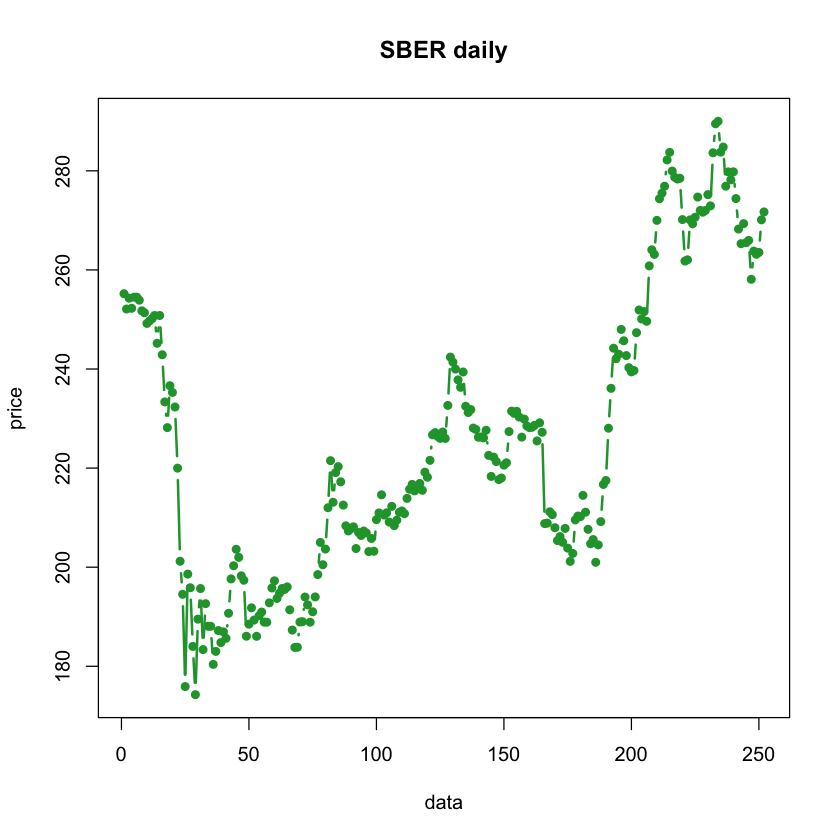

In [210]:
colnames(asset)<- c("SBER")
plot(asset$SBER, type = 'b', main = "SBER daily", pch = 16, col = "#21A138", lwd = 2, xlab= 'data', ylab = "price" )

<p class="aligncenter">
<img  src="moex_logo.png" width="250" height="120" ></img>
</p>

<style>
.aligncenter {
    text-align: center;
}
</style>

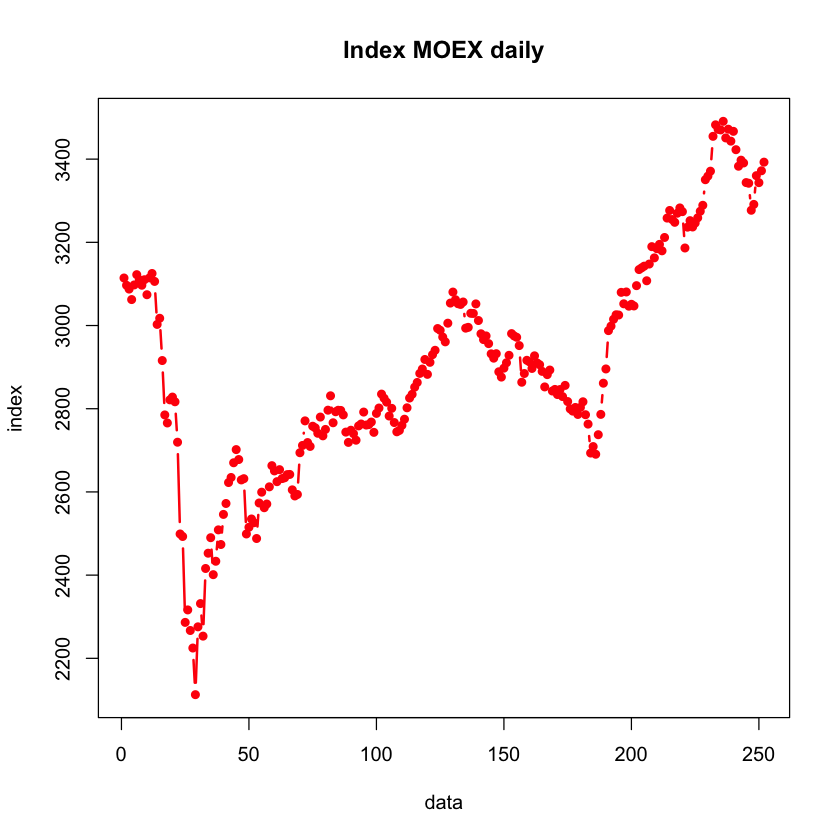

In [199]:
colnames(imoex)<- c("IMOEX")
plot(imoex$IMOEX, type = 'b',main = "Index MOEX daily" ,pch = 16, col = "#FF0308", lwd = 2, xlab= 'data', ylab = "index" )

In [75]:
  Rf <-0.04


len<-  dim(asset)[1]
r1 <- diff(log(asset$X.CLOSE.))
r2 <- diff(log(imoex$X.CLOSE.))
rates <- cbind(r1,r2)


colnames(rates)<- c("SBER","IMOEX")
rownames(rates) <- as.character(as.Date(rownames(asset)[2:len],"%d.%m.%Y"))

rates1 <- read.csv("rates.csv")
rates1[,1] <- as.Date(rates1[,1],"%d.%m.%y")

head(rates)
head(rates1)

,SBER,IMOEX
NA,-0.012182051,-0.005657783
NA,0.008649172,-0.002926764
NA,-0.008054371,-0.008201619
NA,0.008840534,0.011418974
NA,0.000000000,0.007939140
NA,-0.002399734,-0.003921498


,X,SBER,IMOEX
,<date>,<dbl>,<dbl>
1,2020-02-05,-0.012182051,-0.005657783
2,2020-02-06,0.008649172,-0.002926764
3,2020-02-07,-0.008054371,-0.008201619
4,2020-02-10,0.008840534,0.011418974
5,2020-02-11,0.000000000,0.007939140
6,2020-02-12,-0.002399734,-0.003921498


In [ ]:
beta <- CAPM.beta(rates[, "SBER"], rates[, "IMOEX"])
beta

In [67]:
beta_manual <- cov(rates[, "SBER"],rates[, "IMOEX"])/ var(rates[, "IMOEX"])
beta_manual

[1] 1.099421

In [ ]:
alpha <- CAPM.alpha(rates[, "SBER"], rates[, "IMOEX"], Rf = 0.07)

In [78]:
Rf <- 0.07
(alpha_manual <- mean(rates[, "SBER"])-Rf- beta_manual*(mean(rates[, "IMOEX"])- Rf))

[1] 0.00683393

In [79]:
mean(rates[, "SBER"]-Rf)/sd(rates[, "SBER"]-Rf)

[1] -2.973839

In [80]:
mean(rates[, "IMOEX"]-Rf)/sd(rates[, "IMOEX"]-Rf)

[1] -4.180137

In [12]:
 dif <- diff(asset[,2])
 mean_dif <- mean(dif)
library(PerformanceAnalytics)
  data_dif <- as.xts(dif, asset[2:length(asset[,1]),1])
  head(data_dif)


            [,1]
2020-01-04  0.35
2020-01-05  3.20
2020-01-06 -2.27
2020-01-08 10.71
2020-01-11  5.85
2020-01-12  0.50

In [20]:
   (VaR(rates1[, "SBER"], p=.95, method="historical"))

VaR,-0.03178002


In [23]:
 (VaR(rates1[, "SBER"], p=.95, method="gaussian"))

VaR,-0.03825295


In [19]:
ES(rates1[, "SBER"], p=.95, method="historical")

ES,-0.05815242


In [22]:
ES(rates1[, "SBER"], p=.95, method="gaussian")

ES,-0.04803416


In [62]:
rates1x = xts(rates1$SBER, order.by=as.Date(rates1$X))

In [65]:
SharpeRatio(rates1x, Rf = Rf, p = 0.95, FUN = c("StdDev"))

"StdDev Sharpe (Rf=4%, p=95%):",-1.694776
